# Test di modelli NER 

- Addestramento e Fine-Tuning (provo HuggingFace e SpaCy)

Librerie

In [ ]:
!pip install gliner

In [3]:
import pdfplumber
import pdf2image
import pytesseract
from PIL import Image
import cv2
import spacy
import json
import numpy as np
import re
import camelot
from gliner import GLiNER

from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
import torch


# Specificare il percorso di Tesseract
pytesseract.pytesseract.tesseract_cmd = r'C:/Users/TirocinioMatteo/AppData/Local/Programs/Tesseract-OCR/tesseract.exe'  

- Esempio utilizzo Tesseract OCR da imamgine singola

In [3]:
# Imposta il percorso dell'eseguibile di Tesseract (fatto sopra)
# pytesseract.pytesseract.tesseract_cmd = r'C:/Users/TirocinioMatteo/AppData/Local/Programs/Tesseract-OCR/tesseract.exe'  

# Carica un'immagine
image = Image.open('C:/Users/TirocinioMatteo/Desktop/Matteo/Python_3/Vai/ai/PDF/0_documentazione/input_doc/hype_account_balance_images/all_images/1C579227-CFA7-4297-B47D-1E7F8341514F_page-0001.jpg')

# Utilizza Tesseract per estrarre il testo dall'immagine
text = pytesseract.image_to_string(image, lang='eng+ita')

# Stampa il testo estratto
print(text)

Gentile Cliente MATTEO AMAGLIANI,

Data: 02/07/2024

di seguito sono riportati i movimenti effettuati dal 01/07/2024 al 31/07/2024. Questo documento ha solo scopo

informativo e non rappresenta un estratto conto.

| movimenti dove non é indicata una data contabile sono in attesa di essere contabilizzati. L'importo del
pagamento è stato bloccato in seguito alla tua conferma di concludere l'acquisto e deve essere confermato da

parte dell'esercente.

Lista movimenti

dal 01/07/2024 al 31/07/2024

Data Data Tipologia
operazione | contabile

02/07/2024 02/07/2024 | Bonifico ordinario |. Antonucci Matteo
01/07/2024 - Pagamento Iperb
01/07/2024 01/07/2024 Pagamento Canone Hype Plus 06

12024

HYPE S.p.A. segreteria@pec.hype.it

Pazza G. Sella, 1 Capitale sociale: € 1.416.885,00
13900 Biella (BI) www.hype.it

Descrizione
Parcheggio +14€
IPER B PADOVA PD - 29,59€
CANONE HYPE PLUS 06/2024

-1€

Totale Entrate: 14 €

Totale Uscite: 30,59 €

Pag. 1di1

CF e P.IVA 02686590023
Iscr Registo Imprese 

- Lettura testo da PDF multipagina: pdfplumber


In [5]:
# Esempio di utilizzo di pdfplumber per estrarre il testo da un PDF
# Apri il file PDF
with pdfplumber.open("C:/Users/TirocinioMatteo/Desktop/Matteo/Python_3/Vai/ai/PDF/0_documentazione/input_doc/hype_account_balance_pdfs/1C579227-CFA7-4297-B47D-1E7F8341514F.pdf") as pdf:
    # Estrai il testo da tutte le pagine
    text = ""
    for page in pdf.pages:
        text += page.extract_text()
        
# Stampa il testo estratto
print(text)

Data: 02/07/2024
Gentile Cliente MATTEO AMAGLIANI,
di seguito sono riportati i movimenti effettuati dal 01/07/2024 al 31/07/2024. Questo documento ha solo scopo
informativo e non rappresenta un estratto conto.
I movimenti dove non è indicata una data contabile sono in attesa di essere contabilizzati. L'importo del
pagamento è stato bloccato in seguito alla tua conferma di concludere l'acquisto e deve essere confermato da
parte dell'esercente.
Lista movimenti
dal 01/07/2024 al 31/07/2024
Data Data Tipologia Nome Descrizione Importo
operazione contabile
02/07/2024 02/07/2024 Bonifico ordinario Antonucci Matteo Parcheggio + 14€
01/07/2024 --- Pagamento Iper b IPER B PADOVA PD - 29,59€
01/07/2024 01/07/2024 Pagamento Canone Hype Plus 06 CANONE HYPE PLUS 06/2024
- 1€
/2024
Totale Entrate: 14 €
Totale Uscite: 30,59 €
Pag. 1 di 1
HYPE S.p.A. segreteria@pec.hype.it C.F e P.IVA 02686590023
P.zza G. Sella, 1 Capitale sociale: € 1.416.885,00 Iscr Registo Imprese C.C.I.A.A
13900 Biella (BI) www.hy

In [8]:
model = GLiNER.from_pretrained("DeepMount00/universal_ner_ita")

labels = ["data", "cliente", "importo", "banca", "indirizzo", "totale"]

entities = model.predict_entities(text, labels)

max_length = max(len(entity["text"]) for entity in entities)

for entity in entities:
    padded_text = entity["text"].ljust(max_length)
    print(f"{padded_text} => {entity['label']}")


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

gliner_config.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.49k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/497M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/235k [00:00<?, ?B/s]

02/07/2024                     => data
MATTEO AMAGLIANI               => cliente
01/07/2024                     => data
31/07/2024                     => data
01/07/2024                     => data
31/07/2024                     => data
02/07/2024                     => data
02/07/2024                     => data
Antonucci Matteo               => cliente
14€                            => importo
01/07/2024                     => data
IPER B PADOVA PD               => banca
29,59€                         => importo
01/07/2024                     => data
01/07/2024                     => data
06/2024                        => data
Entrate                        => totale
14 €                           => importo
Uscite                         => totale
30,59 €                        => importo
P.zza G. Sella, 1              => indirizzo
Monte Rosa Laghi Alto Piemonte => banca


--> NON ACCURATO POSSO LAVORARE SUL FINE TUTNING. NER ANNOTATOR

Altro modello NER da HuggingFace

In [2]:


tokenizer = AutoTokenizer.from_pretrained("DeepMount00/Italian_NER_XXL")
model = AutoModelForTokenClassification.from_pretrained("DeepMount00/Italian_NER_XXL", ignore_mismatched_sizes=True)
nlp = pipeline("ner", model=model, tokenizer=tokenizer)




In [4]:
example = """Data: 02/07/2024
Gentile Cliente MATTEO AMAGLIANI,
di seguito sono riportati i movimenti effettuati dal 01/07/2024 al 31/07/2024. Questo documento ha solo scopo
informativo e non rappresenta un estratto conto.
I movimenti dove non è indicata una data contabile sono in attesa di essere contabilizzati. L'importo del
pagamento è stato bloccato in seguito alla tua conferma di concludere l'acquisto e deve essere confermato da
parte dell'esercente.
Lista movimenti
dal 01/07/2024 al 31/07/2024
Data Data Tipologia Nome Descrizione Importo
operazione contabile
02/07/2024 02/07/2024 Bonifico ordinario Antonucci Matteo Parcheggio + 14€
01/07/2024 --- Pagamento Iper b IPER B PADOVA PD - 29,59€
01/07/2024 01/07/2024 Pagamento Canone Hype Plus 06 CANONE HYPE PLUS 06/2024
- 1€
/2024
Totale Entrate: 14 €
Totale Uscite: 30,59 €
Pag. 1 di 1
HYPE S.p.A. segreteria@pec.hype.it C.F e P.IVA 02686590023
P.zza G. Sella, 1 Capitale sociale: € 1.416.885,00 Iscr Registo Imprese C.C.I.A.A
13900 Biella (BI) www.hype.it Monte Rosa Laghi Alto Piemonte REA BI - 205555"""
ner_results = nlp(example)
print(ner_results)

[{'entity': 'B-DATA', 'score': 0.875078, 'index': 3, 'word': '02', 'start': 6, 'end': 8}, {'entity': 'I-DATA', 'score': 0.9406202, 'index': 4, 'word': '/', 'start': 8, 'end': 9}, {'entity': 'I-DATA', 'score': 0.9557076, 'index': 5, 'word': '07', 'start': 9, 'end': 11}, {'entity': 'I-DATA', 'score': 0.96543336, 'index': 6, 'word': '/', 'start': 11, 'end': 12}, {'entity': 'I-DATA', 'score': 0.96543425, 'index': 7, 'word': '202', 'start': 12, 'end': 15}, {'entity': 'I-DATA', 'score': 0.96723413, 'index': 8, 'word': '##4', 'start': 15, 'end': 16}, {'entity': 'B-NOME', 'score': 0.9425311, 'index': 11, 'word': 'MAT', 'start': 33, 'end': 36}, {'entity': 'I-NOME', 'score': 0.94544923, 'index': 12, 'word': '##TE', 'start': 36, 'end': 38}, {'entity': 'I-NOME', 'score': 0.9041818, 'index': 13, 'word': '##O', 'start': 38, 'end': 39}, {'entity': 'B-COGNOME', 'score': 0.89944834, 'index': 14, 'word': 'AM', 'start': 40, 'end': 42}, {'entity': 'I-COGNOME', 'score': 0.9098277, 'index': 15, 'word': '##A

Textarea(value='Scrivi il tuo testo qui.', description='Testo:', layout=Layout(height='100px', width='100%'), …

Button(description='Esegui NER', icon='check', style=ButtonStyle(), tooltip="Clicca per eseguire l'analisi NER…

,entity,score,index,word,start,end
0,B-NOME,0.798147,4,ma,15,17
1,I-NOME,0.922447,5,##tte,17,20
2,I-NOME,0.944755,6,##o,20,21



Testo con entità riconosciute:
ciao mi chiamo [ma: B-NOME][##tte: I-NOME][##o: I-NOME]


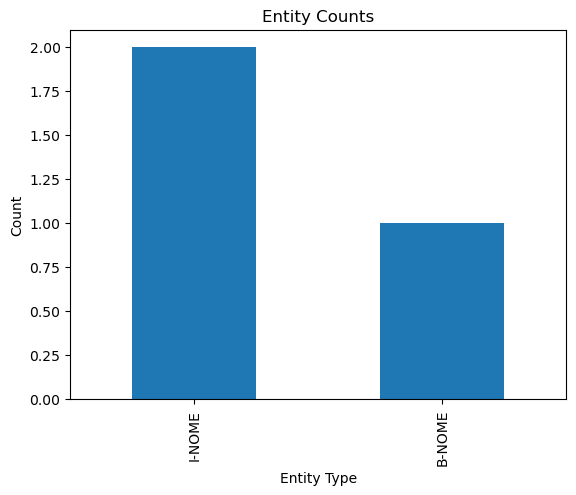

,entity,score,index,word,start,end
0,B-NOME,0.91784,4,Matteo,15,21



Testo con entità riconosciute:
ciao mi chiamo [Matteo: B-NOME]


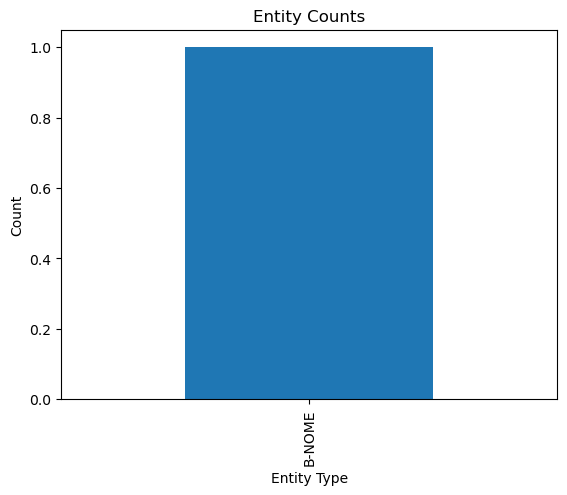

,entity,score,index,word,start,end
0,B-DATA,0.875078,3,02,6,8
1,I-DATA,0.940620,4,/,8,9
2,I-DATA,0.955708,5,07,9,11
3,I-DATA,0.965433,6,/,11,12
4,I-DATA,0.965434,7,202,12,15
...,...,...,...,...,...,...
170,I-LUOGO,0.339851,314,Alto,1023,1027
171,I-LUOGO,0.642395,315,Piemonte,1028,1036
172,I-CODICE_FISCALE,0.190771,321,205,1046,1049
173,I-CODICE_FISCALE,0.345319,322,##55,1049,1051



Testo con entità riconosciute:
Data: [02: B-DATA][/: I-DATA][07: I-DATA][/: I-DATA][202: I-DATA][##4: I-DATA]
Gentile Cliente [MAT: B-NOME][##TE: I-NOME][##O: I-NOME] [AM: B-COGNOME][##AG: I-COGNOME][##LI: I-COGNOME][##ANI: I-COGNOME],
di seguito sono riportati i movimenti effettuati dal [01: B-DATA][/: I-DATA][07: I-DATA][/: I-DATA][202: I-DATA][##4: I-DATA] al [31: B-DATA][/: I-DATA][07: I-DATA][/: I-DATA][202: I-DATA][##4: I-DATA][.: I-DATA] Questo documento ha solo scopo
informativo e non rappresenta un estratto conto.
I movimenti dove non è indicata una data contabile sono in attesa di essere contabilizzati. L'importo del
pagamento è stato bloccato in seguito alla tua conferma di concludere l'acquisto e deve essere confermato da
parte dell'esercente.
Lista movimenti
dal [01: B-DATA][/: I-DATA][07: I-DATA][/: I-DATA][202: I-DATA][##4: I-DATA] al [31: B-DATA][/: I-DATA][07: I-DATA][/: I-DATA][202: I-DATA][##4: I-DATA]
Data Data Tipologia Nome Descrizione Importo
operazione contabil

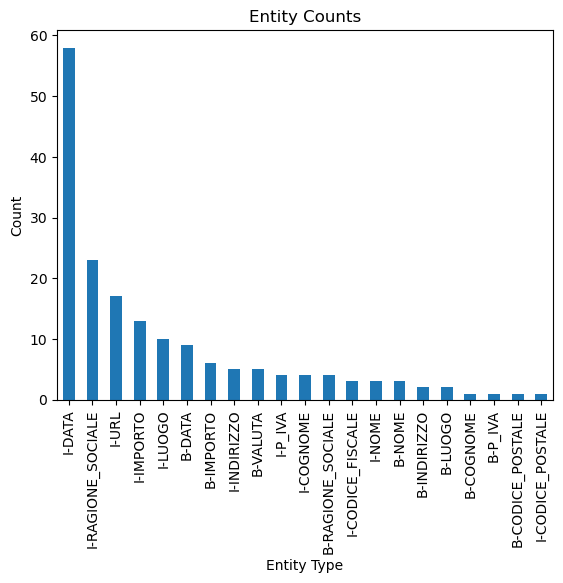

,entity,score,index,word,start,end
0,B-DATA,0.875078,3,02,6,8
1,I-DATA,0.940620,4,/,8,9
2,I-DATA,0.955708,5,07,9,11
3,I-DATA,0.965433,6,/,11,12
4,I-DATA,0.965434,7,202,12,15
...,...,...,...,...,...,...
170,I-LUOGO,0.339851,314,Alto,1023,1027
171,I-LUOGO,0.642395,315,Piemonte,1028,1036
172,I-CODICE_FISCALE,0.190771,321,205,1046,1049
173,I-CODICE_FISCALE,0.345319,322,##55,1049,1051



Testo con entità riconosciute:
Data: [02: B-DATA][/: I-DATA][07: I-DATA][/: I-DATA][202: I-DATA][##4: I-DATA]
Gentile Cliente [MAT: B-NOME][##TE: I-NOME][##O: I-NOME] [AM: B-COGNOME][##AG: I-COGNOME][##LI: I-COGNOME][##ANI: I-COGNOME],
di seguito sono riportati i movimenti effettuati dal [01: B-DATA][/: I-DATA][07: I-DATA][/: I-DATA][202: I-DATA][##4: I-DATA] al [31: B-DATA][/: I-DATA][07: I-DATA][/: I-DATA][202: I-DATA][##4: I-DATA][.: I-DATA] Questo documento ha solo scopo
informativo e non rappresenta un estratto conto.
I movimenti dove non è indicata una data contabile sono in attesa di essere contabilizzati. L'importo del
pagamento è stato bloccato in seguito alla tua conferma di concludere l'acquisto e deve essere confermato da
parte dell'esercente.
Lista movimenti
dal [01: B-DATA][/: I-DATA][07: I-DATA][/: I-DATA][202: I-DATA][##4: I-DATA] al [31: B-DATA][/: I-DATA][07: I-DATA][/: I-DATA][202: I-DATA][##4: I-DATA]
Data Data Tipologia Nome Descrizione Importo
operazione contabil

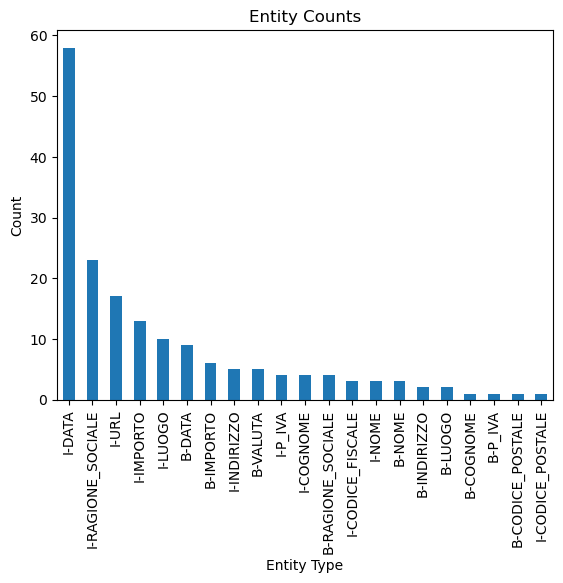

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

# Definire una funzione per eseguire il NER e visualizzare i risultati
def ner_and_visualize(text):
    ner_results = nlp(text)
    
    # Creare un dataframe dai risultati NER
    df = pd.DataFrame(ner_results)
    
    # Visualizzare il dataframe
    display(df)
    
    # Visualizzare i risultati NER nel testo originale
    highlighted_text = text
    for entity in sorted(ner_results, key=lambda x: x['start'], reverse=True):
        highlighted_text = highlighted_text[:entity['start']] + f"[{entity['word']}: {entity['entity']}]" + highlighted_text[entity['end']:]
    
    print("\nTesto con entità riconosciute:")
    print(highlighted_text)
    
    # Generare un grafico delle entità riconosciute
    entity_counts = df['entity'].value_counts()
    entity_counts.plot(kind='bar')
    plt.xlabel('Entity Type')
    plt.ylabel('Count')
    plt.title('Entity Counts')
    plt.show()

# Creare un widget di input di testo
text_input = widgets.Textarea(
    value='Scrivi il tuo testo qui.',
    placeholder='Inserisci il testo da analizzare...',
    description='Testo:',
    disabled=False,
    layout=widgets.Layout(width='100%', height='100px')
)

# Creare un pulsante per eseguire l'analisi
button = widgets.Button(
    description='Esegui NER',
    disabled=False,
    button_style='',
    tooltip='Clicca per eseguire l\'analisi NER',
    icon='check'
)

# Collegare il pulsante alla funzione di analisi
button.on_click(lambda b: ner_and_visualize(text_input.value))

# Visualizzare il widget di input e il pulsante
display(text_input, button)